In [1]:
#!for a in /sys/bus/pci/devices/*; do echo 0 | sudo tee -a $a/numa_node; done
import tensorflow as tf
import os
from data_processing import dataset
from models import model
from utils import tools
from plots import plots, edge_detection_plots

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
#np.set_printoptions(threshold=sys.maxsize)

2022-12-04 12:40:28.458486: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-04 12:40:28.614850: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-04 12:40:28.668544: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-04 12:40:29.225673: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [2]:
config_directory = 'edge_detection_with_prior'

config_path = os.path.join(os.getcwd(), 'configs', config_directory)
Model = model.Model(config_path)
DataProcessing = dataset.DataProcessing(Model.cfg["INPUT_SHAPE"], Model.cfg["OUTPUT_SHAPE"], config_path)
tools.parser(Model.cfg, DataProcessing.cfg)
Model.load_data(DataProcessing.cfg["NAME"])
DataProcessing.path_definitions()

2022-12-04 12:40:31.391643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 12:40:31.404929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 12:40:31.405035: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-04 12:40:31.406201: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

# Load Dataset, Preprocess Images and Dataset

The TRAIN DS contains 1500 images.
The TEST DS contains 247 images.
The IMG_ONLY DS contains 80 images.


2022-12-04 12:40:48.581927: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1050 of 1500
2022-12-04 12:40:56.290455: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Shuffle buffer filled.


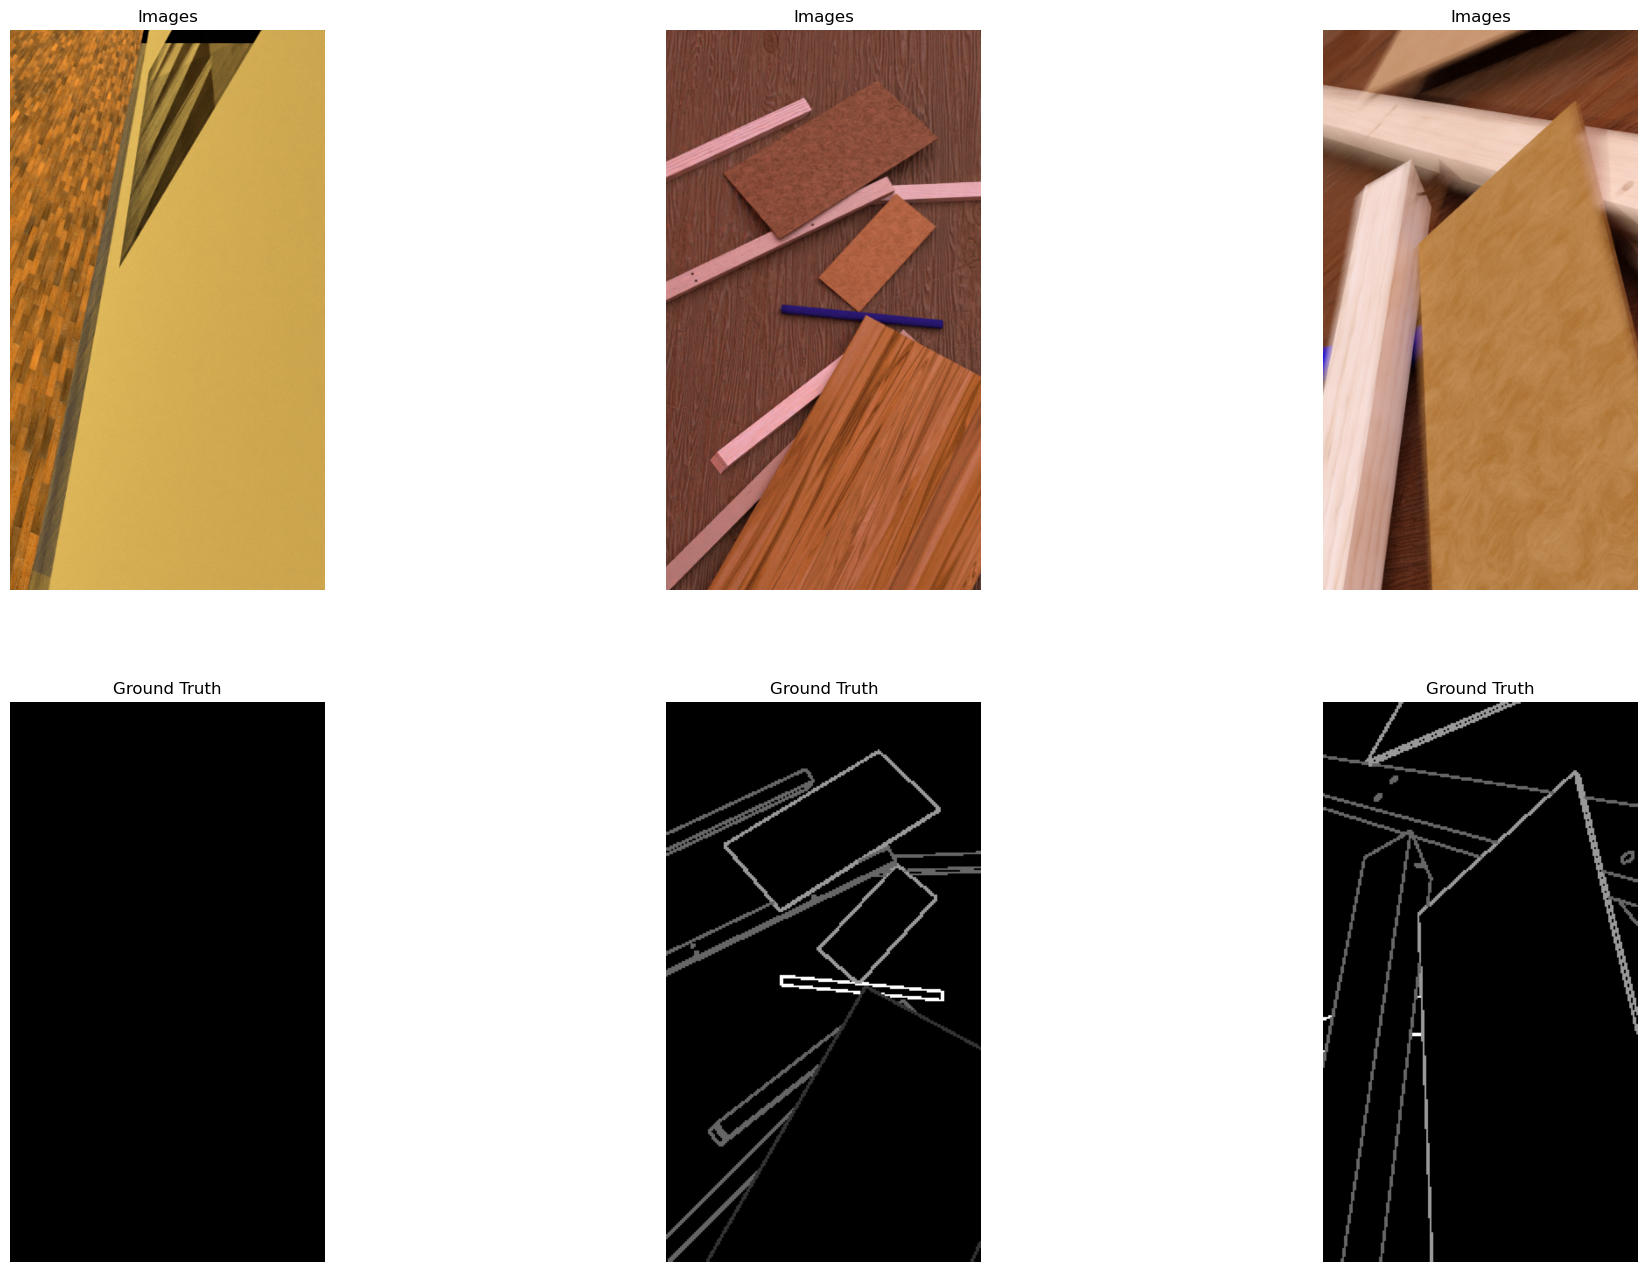

In [3]:
if Model.train_model:
    train_ds, img_count_train = DataProcessing.load_dataset(DataProcessing.key.train)
test_ds, img_count_test = DataProcessing.load_dataset(DataProcessing.key.test)

img_only_ds, img_count_img_only_ds = DataProcessing.load_dataset(DataProcessing.key.img_only)

if Model.train_model:
    for inp, out in train_ds.take(1):
        edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
                                        batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                        num_classes=DataProcessing.num_classes['edge'])

# Define, Compile and Train Model

In [4]:
if Model.train_model:
    model = Model.get_neural_network_model(DataProcessing.num_classes['edge'])
    # model.summary()

    lr = Model.get_lr(img_count_train, DataProcessing.cfg['TRAIN']['BATCH_SIZE'])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss=Model.get_loss_function(),
                  metrics=Model.get_metrics(DataProcessing.num_classes['edge']))

    history = model.fit(train_ds, epochs=Model.cfg["EPOCHS"], validation_data=train_ds,
                        callbacks=Model.get_callbacks(), verbose=1)

model = Model.get_best_model_from_checkpoints()

(640, 360, 3)
Epoch 1/80


2022-12-04 12:41:03.505384: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-12-04 12:41:04.918614: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


500/500 [==============================] - 59s 104ms/step - loss: 129.8375 - accuracy: 0.9735 - accuracy_1: 0.9918 - accuracy_2: 0.9759 - accuracy_3: 0.9759 - accuracy_4: 0.9275 - accuracy_5: 0.9967 - f1: 0.0030 - precision: 0.0030 - recall: 0.0060 - f1_1: 0.0027 - precision_1: 0.0052 - recall_1: 0.0037 - f1_2: 0.0000e+00 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - f1_3: 0.0054 - precision_3: 0.0063 - recall_3: 0.0104 - f1_4: 0.0042 - precision_4: 0.0023 - recall_4: 0.0628 - f1_5: 0.0000e+00 - precision_5: 0.0000e+00 - recall_5: 0.0000e+00 - val_loss: 162.9123 - val_accuracy: 0.9913 - val_accuracy_1: 0.9952 - val_accuracy_2: 0.9760 - val_accuracy_3: 0.9911 - val_accuracy_4: 0.9973 - val_accuracy_5: 0.9968 - val_f1: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_1: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_2: 0.0000e+00 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_f1_3: 0.0000e+00 - val_precision_3: 0.

500/500 [==============================] - 49s 97ms/step - loss: 42.9163 - accuracy: 0.9936 - accuracy_1: 0.9953 - accuracy_2: 0.9855 - accuracy_3: 0.9918 - accuracy_4: 0.9975 - accuracy_5: 0.9980 - f1: 0.5535 - precision: 0.6928 - recall: 0.4610 - f1_1: 0.0000e+00 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - f1_2: 0.6537 - precision_2: 0.7464 - recall_2: 0.5819 - f1_3: 0.4654 - precision_3: 0.5405 - recall_3: 0.4094 - f1_4: 0.2950 - precision_4: 0.6112 - recall_4: 0.1954 - f1_5: 0.6617 - precision_5: 0.7245 - recall_5: 0.6096 - val_loss: 46.7552 - val_accuracy: 0.9933 - val_accuracy_1: 0.9952 - val_accuracy_2: 0.9845 - val_accuracy_3: 0.9911 - val_accuracy_4: 0.9974 - val_accuracy_5: 0.9982 - val_f1: 0.5203 - val_precision: 0.6898 - val_recall: 0.4176 - val_f1_1: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_2: 0.6040 - val_precision_2: 0.7820 - val_recall_2: 0.4920 - val_f1_3: 0.4832 - val_precision_3: 0.5019 - val_recall_3: 0.4657 - val_f1_4: 0.0

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=47.72-epoch=10.00-f1=0.5656/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=47.72-epoch=10.00-f1=0.5656/assets


500/500 [==============================] - 57s 114ms/step - loss: 40.7500 - accuracy: 0.9939 - accuracy_1: 0.9952 - accuracy_2: 0.9866 - accuracy_3: 0.9922 - accuracy_4: 0.9974 - accuracy_5: 0.9981 - f1: 0.5906 - precision: 0.7329 - recall: 0.4947 - f1_1: 0.0000e+00 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - f1_2: 0.6919 - precision_2: 0.7793 - recall_2: 0.6222 - f1_3: 0.5151 - precision_3: 0.6080 - recall_3: 0.4473 - f1_4: 0.3667 - precision_4: 0.6491 - recall_4: 0.2560 - f1_5: 0.6824 - precision_5: 0.7527 - recall_5: 0.6243 - val_loss: 47.7219 - val_accuracy: 0.9934 - val_accuracy_1: 0.9952 - val_accuracy_2: 0.9850 - val_accuracy_3: 0.9911 - val_accuracy_4: 0.9973 - val_accuracy_5: 0.9982 - val_f1: 0.5656 - val_precision: 0.6583 - val_recall: 0.4957 - val_f1_1: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_2: 0.6632 - val_precision_2: 0.7197 - val_recall_2: 0.6149 - val_f1_3: 0.5182 - val_precision_3: 0.4987 - val_recall_3: 0.5393 - val_f1_4: 0.

500/500 [==============================] - 49s 97ms/step - loss: 35.2551 - accuracy: 0.9946 - accuracy_1: 0.9953 - accuracy_2: 0.9879 - accuracy_3: 0.9936 - accuracy_4: 0.9977 - accuracy_5: 0.9983 - f1: 0.6334 - precision: 0.7627 - recall: 0.5416 - f1_1: 0.0074 - precision_1: 0.1097 - recall_1: 0.0038 - f1_2: 0.7279 - precision_2: 0.8005 - recall_2: 0.6675 - f1_3: 0.5829 - precision_3: 0.6759 - recall_3: 0.5137 - f1_4: 0.4132 - precision_4: 0.6299 - recall_4: 0.3079 - f1_5: 0.7003 - precision_5: 0.7624 - recall_5: 0.6484 - val_loss: 40.7453 - val_accuracy: 0.9941 - val_accuracy_1: 0.9952 - val_accuracy_2: 0.9878 - val_accuracy_3: 0.9920 - val_accuracy_4: 0.9972 - val_accuracy_5: 0.9981 - val_f1: 0.6333 - val_precision: 0.6849 - val_recall: 0.5890 - val_f1_1: 0.0000e+00 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_2: 0.7189 - val_precision_2: 0.8071 - val_recall_2: 0.6481 - val_f1_3: 0.6032 - val_precision_3: 0.5387 - val_recall_3: 0.6852 - val_f1_4: 0.4892 - val_pr

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=33.37-epoch=20.00-f1=0.6636/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=33.37-epoch=20.00-f1=0.6636/assets


500/500 [==============================] - 57s 115ms/step - loss: 34.0584 - accuracy: 0.9948 - accuracy_1: 0.9956 - accuracy_2: 0.9885 - accuracy_3: 0.9939 - accuracy_4: 0.9978 - accuracy_5: 0.9983 - f1: 0.6603 - precision: 0.7588 - recall: 0.5845 - f1_1: 0.3781 - precision_1: 0.5829 - recall_1: 0.2811 - f1_2: 0.7377 - precision_2: 0.8010 - recall_2: 0.6838 - f1_3: 0.6020 - precision_3: 0.7144 - recall_3: 0.5204 - f1_4: 0.4559 - precision_4: 0.6501 - recall_4: 0.3524 - f1_5: 0.7142 - precision_5: 0.7590 - recall_5: 0.6747 - val_loss: 33.3731 - val_accuracy: 0.9948 - val_accuracy_1: 0.9947 - val_accuracy_2: 0.9890 - val_accuracy_3: 0.9939 - val_accuracy_4: 0.9979 - val_accuracy_5: 0.9984 - val_f1: 0.6636 - val_precision: 0.7592 - val_recall: 0.5893 - val_f1_1: 0.4736 - val_precision_1: 0.4486 - val_recall_1: 0.5016 - val_f1_2: 0.7463 - val_precision_2: 0.8389 - val_recall_2: 0.6722 - val_f1_3: 0.5520 - val_precision_3: 0.8057 - val_recall_3: 0.4198 - val_f1_4: 0.4778 - val_precision_4: 

500/500 [==============================] - 49s 97ms/step - loss: 31.2565 - accuracy: 0.9952 - accuracy_1: 0.9959 - accuracy_2: 0.9894 - accuracy_3: 0.9943 - accuracy_4: 0.9979 - accuracy_5: 0.9984 - f1: 0.6897 - precision: 0.7839 - recall: 0.6157 - f1_1: 0.4575 - precision_1: 0.6566 - recall_1: 0.3514 - f1_2: 0.7610 - precision_2: 0.8228 - recall_2: 0.7079 - f1_3: 0.6362 - precision_3: 0.7382 - recall_3: 0.5595 - f1_4: 0.4670 - precision_4: 0.6713 - recall_4: 0.3591 - f1_5: 0.7406 - precision_5: 0.7868 - recall_5: 0.7002 - val_loss: 31.1619 - val_accuracy: 0.9950 - val_accuracy_1: 0.9957 - val_accuracy_2: 0.9889 - val_accuracy_3: 0.9944 - val_accuracy_4: 0.9979 - val_accuracy_5: 0.9982 - val_f1: 0.6591 - val_precision: 0.8150 - val_recall: 0.5533 - val_f1_1: 0.2217 - val_precision_1: 0.8018 - val_recall_1: 0.1286 - val_f1_2: 0.7314 - val_precision_2: 0.8703 - val_recall_2: 0.6307 - val_f1_3: 0.6117 - val_precision_3: 0.8094 - val_recall_3: 0.4916 - val_f1_4: 0.5444 - val_precision_4: 0

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=30.09-epoch=30.00-f1=0.6832/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=30.09-epoch=30.00-f1=0.6832/assets


500/500 [==============================] - 58s 115ms/step - loss: 30.7211 - accuracy: 0.9951 - accuracy_1: 0.9960 - accuracy_2: 0.9890 - accuracy_3: 0.9946 - accuracy_4: 0.9977 - accuracy_5: 0.9984 - f1: 0.6926 - precision: 0.7769 - recall: 0.6248 - f1_1: 0.4955 - precision_1: 0.6504 - recall_1: 0.4010 - f1_2: 0.7552 - precision_2: 0.8147 - recall_2: 0.7039 - f1_3: 0.6493 - precision_3: 0.7394 - recall_3: 0.5793 - f1_4: 0.4765 - precision_4: 0.6599 - recall_4: 0.3732 - f1_5: 0.7510 - precision_5: 0.7887 - recall_5: 0.7168 - val_loss: 30.0856 - val_accuracy: 0.9953 - val_accuracy_1: 0.9961 - val_accuracy_2: 0.9895 - val_accuracy_3: 0.9944 - val_accuracy_4: 0.9980 - val_accuracy_5: 0.9984 - val_f1: 0.6832 - val_precision: 0.8276 - val_recall: 0.5817 - val_f1_1: 0.4578 - val_precision_1: 0.6890 - val_recall_1: 0.3427 - val_f1_2: 0.7575 - val_precision_2: 0.8519 - val_recall_2: 0.6819 - val_f1_3: 0.5910 - val_precision_3: 0.8576 - val_recall_3: 0.4509 - val_f1_4: 0.5151 - val_precision_4: 

500/500 [==============================] - 49s 97ms/step - loss: 28.8214 - accuracy: 0.9956 - accuracy_1: 0.9965 - accuracy_2: 0.9900 - accuracy_3: 0.9952 - accuracy_4: 0.9980 - accuracy_5: 0.9984 - f1: 0.7205 - precision: 0.7956 - recall: 0.6585 - f1_1: 0.5360 - precision_1: 0.7032 - recall_1: 0.4337 - f1_2: 0.7763 - precision_2: 0.8275 - recall_2: 0.7313 - f1_3: 0.6857 - precision_3: 0.7714 - recall_3: 0.6174 - f1_4: 0.5234 - precision_4: 0.6616 - recall_4: 0.4350 - f1_5: 0.7651 - precision_5: 0.7942 - recall_5: 0.7384 - val_loss: 29.3679 - val_accuracy: 0.9954 - val_accuracy_1: 0.9964 - val_accuracy_2: 0.9897 - val_accuracy_3: 0.9948 - val_accuracy_4: 0.9980 - val_accuracy_5: 0.9980 - val_f1: 0.7115 - val_precision: 0.7838 - val_recall: 0.6514 - val_f1_1: 0.5111 - val_precision_1: 0.7440 - val_recall_1: 0.3893 - val_f1_2: 0.7776 - val_precision_2: 0.8080 - val_recall_2: 0.7495 - val_f1_3: 0.6367 - val_precision_3: 0.8501 - val_recall_3: 0.5090 - val_f1_4: 0.5505 - val_precision_4: 0

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=30.45-epoch=40.00-f1=0.7144/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=30.45-epoch=40.00-f1=0.7144/assets


500/500 [==============================] - 57s 115ms/step - loss: 28.0221 - accuracy: 0.9956 - accuracy_1: 0.9965 - accuracy_2: 0.9900 - accuracy_3: 0.9951 - accuracy_4: 0.9980 - accuracy_5: 0.9985 - f1: 0.7223 - precision: 0.8017 - recall: 0.6576 - f1_1: 0.5528 - precision_1: 0.7229 - recall_1: 0.4483 - f1_2: 0.7794 - precision_2: 0.8288 - recall_2: 0.7355 - f1_3: 0.6826 - precision_3: 0.7803 - recall_3: 0.6079 - f1_4: 0.5228 - precision_4: 0.6821 - recall_4: 0.4244 - f1_5: 0.7509 - precision_5: 0.7939 - recall_5: 0.7126 - val_loss: 30.4459 - val_accuracy: 0.9954 - val_accuracy_1: 0.9964 - val_accuracy_2: 0.9893 - val_accuracy_3: 0.9946 - val_accuracy_4: 0.9980 - val_accuracy_5: 0.9986 - val_f1: 0.7144 - val_precision: 0.7706 - val_recall: 0.6659 - val_f1_1: 0.5656 - val_precision_1: 0.6785 - val_recall_1: 0.4848 - val_f1_2: 0.7606 - val_precision_2: 0.8179 - val_recall_2: 0.7109 - val_f1_3: 0.6957 - val_precision_3: 0.6942 - val_recall_3: 0.6972 - val_f1_4: 0.5370 - val_precision_4: 

500/500 [==============================] - 49s 97ms/step - loss: 27.0771 - accuracy: 0.9956 - accuracy_1: 0.9965 - accuracy_2: 0.9898 - accuracy_3: 0.9950 - accuracy_4: 0.9980 - accuracy_5: 0.9986 - f1: 0.7292 - precision: 0.8018 - recall: 0.6688 - f1_1: 0.5522 - precision_1: 0.7187 - recall_1: 0.4486 - f1_2: 0.7842 - precision_2: 0.8289 - recall_2: 0.7442 - f1_3: 0.6970 - precision_3: 0.7838 - recall_3: 0.6275 - f1_4: 0.5266 - precision_4: 0.6745 - recall_4: 0.4328 - f1_5: 0.7627 - precision_5: 0.7988 - recall_5: 0.7299 - val_loss: 30.6899 - val_accuracy: 0.9954 - val_accuracy_1: 0.9964 - val_accuracy_2: 0.9896 - val_accuracy_3: 0.9946 - val_accuracy_4: 0.9979 - val_accuracy_5: 0.9986 - val_f1: 0.7021 - val_precision: 0.8105 - val_recall: 0.6193 - val_f1_1: 0.5618 - val_precision_1: 0.6777 - val_recall_1: 0.4798 - val_f1_2: 0.7671 - val_precision_2: 0.8292 - val_recall_2: 0.7137 - val_f1_3: 0.5980 - val_precision_3: 0.8873 - val_recall_3: 0.4510 - val_f1_4: 0.4890 - val_precision_4: 0

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=26.84-epoch=50.00-f1=0.7218/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=26.84-epoch=50.00-f1=0.7218/assets


500/500 [==============================] - 58s 116ms/step - loss: 26.5249 - accuracy: 0.9957 - accuracy_1: 0.9964 - accuracy_2: 0.9904 - accuracy_3: 0.9952 - accuracy_4: 0.9980 - accuracy_5: 0.9986 - f1: 0.7307 - precision: 0.8027 - recall: 0.6706 - f1_1: 0.5829 - precision_1: 0.7279 - recall_1: 0.4863 - f1_2: 0.7843 - precision_2: 0.8341 - recall_2: 0.7401 - f1_3: 0.7054 - precision_3: 0.7806 - recall_3: 0.6435 - f1_4: 0.5377 - precision_4: 0.6847 - recall_4: 0.4429 - f1_5: 0.7524 - precision_5: 0.7899 - recall_5: 0.7186 - val_loss: 26.8366 - val_accuracy: 0.9957 - val_accuracy_1: 0.9965 - val_accuracy_2: 0.9899 - val_accuracy_3: 0.9953 - val_accuracy_4: 0.9979 - val_accuracy_5: 0.9987 - val_f1: 0.7218 - val_precision: 0.8185 - val_recall: 0.6456 - val_f1_1: 0.4876 - val_precision_1: 0.8373 - val_recall_1: 0.3439 - val_f1_2: 0.7645 - val_precision_2: 0.8685 - val_recall_2: 0.6828 - val_f1_3: 0.7222 - val_precision_3: 0.7672 - val_recall_3: 0.6821 - val_f1_4: 0.5962 - val_precision_4: 

500/500 [==============================] - 51s 102ms/step - loss: 25.5208 - accuracy: 0.9958 - accuracy_1: 0.9968 - accuracy_2: 0.9903 - accuracy_3: 0.9951 - accuracy_4: 0.9981 - accuracy_5: 0.9987 - f1: 0.7400 - precision: 0.8074 - recall: 0.6831 - f1_1: 0.6018 - precision_1: 0.7453 - recall_1: 0.5050 - f1_2: 0.7874 - precision_2: 0.8332 - recall_2: 0.7464 - f1_3: 0.7111 - precision_3: 0.7807 - recall_3: 0.6531 - f1_4: 0.5572 - precision_4: 0.7111 - recall_4: 0.4587 - f1_5: 0.7805 - precision_5: 0.8156 - recall_5: 0.7484 - val_loss: 25.6438 - val_accuracy: 0.9958 - val_accuracy_1: 0.9967 - val_accuracy_2: 0.9903 - val_accuracy_3: 0.9953 - val_accuracy_4: 0.9981 - val_accuracy_5: 0.9986 - val_f1: 0.7232 - val_precision: 0.8480 - val_recall: 0.6305 - val_f1_1: 0.5458 - val_precision_1: 0.8037 - val_recall_1: 0.4132 - val_f1_2: 0.7774 - val_precision_2: 0.8631 - val_recall_2: 0.7072 - val_f1_3: 0.6804 - val_precision_3: 0.8594 - val_recall_3: 0.5632 - val_f1_4: 0.5767 - val_precision_4: 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=26.00-epoch=60.00-f1=0.7423/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=26.00-epoch=60.00-f1=0.7423/assets


500/500 [==============================] - 60s 121ms/step - loss: 25.3336 - accuracy: 0.9957 - accuracy_1: 0.9967 - accuracy_2: 0.9903 - accuracy_3: 0.9951 - accuracy_4: 0.9980 - accuracy_5: 0.9986 - f1: 0.7455 - precision: 0.8103 - recall: 0.6903 - f1_1: 0.6188 - precision_1: 0.7562 - recall_1: 0.5240 - f1_2: 0.7919 - precision_2: 0.8342 - recall_2: 0.7538 - f1_3: 0.7248 - precision_3: 0.7971 - recall_3: 0.6647 - f1_4: 0.5634 - precision_4: 0.6933 - recall_4: 0.4752 - f1_5: 0.7687 - precision_5: 0.8049 - recall_5: 0.7357 - val_loss: 25.9966 - val_accuracy: 0.9959 - val_accuracy_1: 0.9969 - val_accuracy_2: 0.9903 - val_accuracy_3: 0.9955 - val_accuracy_4: 0.9981 - val_accuracy_5: 0.9986 - val_f1: 0.7423 - val_precision: 0.8111 - val_recall: 0.6842 - val_f1_1: 0.5807 - val_precision_1: 0.8091 - val_recall_1: 0.4529 - val_f1_2: 0.7910 - val_precision_2: 0.8168 - val_recall_2: 0.7669 - val_f1_3: 0.7050 - val_precision_3: 0.8379 - val_recall_3: 0.6085 - val_f1_4: 0.5738 - val_precision_4: 

500/500 [==============================] - 49s 98ms/step - loss: 24.2985 - accuracy: 0.9961 - accuracy_1: 0.9970 - accuracy_2: 0.9911 - accuracy_3: 0.9958 - accuracy_4: 0.9981 - accuracy_5: 0.9987 - f1: 0.7526 - precision: 0.8161 - recall: 0.6982 - f1_1: 0.6228 - precision_1: 0.7624 - recall_1: 0.5268 - f1_2: 0.7995 - precision_2: 0.8420 - recall_2: 0.7610 - f1_3: 0.7259 - precision_3: 0.7957 - recall_3: 0.6677 - f1_4: 0.5648 - precision_4: 0.6892 - recall_4: 0.4799 - f1_5: 0.7829 - precision_5: 0.8173 - recall_5: 0.7514 - val_loss: 24.9109 - val_accuracy: 0.9959 - val_accuracy_1: 0.9969 - val_accuracy_2: 0.9905 - val_accuracy_3: 0.9956 - val_accuracy_4: 0.9980 - val_accuracy_5: 0.9986 - val_f1: 0.7432 - val_precision: 0.8228 - val_recall: 0.6776 - val_f1_1: 0.6198 - val_precision_1: 0.7456 - val_recall_1: 0.5303 - val_f1_2: 0.7815 - val_precision_2: 0.8697 - val_recall_2: 0.7096 - val_f1_3: 0.7291 - val_precision_3: 0.8196 - val_recall_3: 0.6567 - val_f1_4: 0.6044 - val_precision_4: 0

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=24.39-epoch=70.00-f1=0.7520/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=24.39-epoch=70.00-f1=0.7520/assets


500/500 [==============================] - 59s 118ms/step - loss: 24.0806 - accuracy: 0.9961 - accuracy_1: 0.9969 - accuracy_2: 0.9911 - accuracy_3: 0.9958 - accuracy_4: 0.9978 - accuracy_5: 0.9987 - f1: 0.7499 - precision: 0.8147 - recall: 0.6948 - f1_1: 0.6374 - precision_1: 0.7596 - recall_1: 0.5492 - f1_2: 0.7961 - precision_2: 0.8412 - recall_2: 0.7557 - f1_3: 0.7284 - precision_3: 0.8009 - recall_3: 0.6682 - f1_4: 0.5565 - precision_4: 0.6831 - recall_4: 0.4697 - f1_5: 0.7840 - precision_5: 0.8185 - recall_5: 0.7524 - val_loss: 24.3913 - val_accuracy: 0.9960 - val_accuracy_1: 0.9970 - val_accuracy_2: 0.9908 - val_accuracy_3: 0.9957 - val_accuracy_4: 0.9980 - val_accuracy_5: 0.9987 - val_f1: 0.7520 - val_precision: 0.8249 - val_recall: 0.6909 - val_f1_1: 0.6588 - val_precision_1: 0.7173 - val_recall_1: 0.6091 - val_f1_2: 0.7946 - val_precision_2: 0.8504 - val_recall_2: 0.7456 - val_f1_3: 0.7340 - val_precision_3: 0.8163 - val_recall_3: 0.6667 - val_f1_4: 0.5030 - val_precision_4: 

500/500 [==============================] - 49s 98ms/step - loss: 23.5168 - accuracy: 0.9961 - accuracy_1: 0.9972 - accuracy_2: 0.9907 - accuracy_3: 0.9958 - accuracy_4: 0.9981 - accuracy_5: 0.9987 - f1: 0.7575 - precision: 0.8168 - recall: 0.7063 - f1_1: 0.6474 - precision_1: 0.7573 - recall_1: 0.5661 - f1_2: 0.7952 - precision_2: 0.8377 - recall_2: 0.7569 - f1_3: 0.7449 - precision_3: 0.8094 - recall_3: 0.6901 - f1_4: 0.5621 - precision_4: 0.6915 - recall_4: 0.4740 - f1_5: 0.7920 - precision_5: 0.8246 - recall_5: 0.7619 - val_loss: 23.2481 - val_accuracy: 0.9961 - val_accuracy_1: 0.9971 - val_accuracy_2: 0.9909 - val_accuracy_3: 0.9959 - val_accuracy_4: 0.9981 - val_accuracy_5: 0.9987 - val_f1: 0.7583 - val_precision: 0.8322 - val_recall: 0.6965 - val_f1_1: 0.6363 - val_precision_1: 0.7786 - val_recall_1: 0.5380 - val_f1_2: 0.7961 - val_precision_2: 0.8582 - val_recall_2: 0.7423 - val_f1_3: 0.7525 - val_precision_3: 0.8123 - val_recall_3: 0.7009 - val_f1_4: 0.5896 - val_precision_4: 0

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=23.28-epoch=80.00-f1=0.7566/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/CKPT/ckpt-loss=23.28-epoch=80.00-f1=0.7566/assets


500/500 [==============================] - 59s 119ms/step - loss: 23.2230 - accuracy: 0.9961 - accuracy_1: 0.9970 - accuracy_2: 0.9908 - accuracy_3: 0.9957 - accuracy_4: 0.9983 - accuracy_5: 0.9986 - f1: 0.7639 - precision: 0.8216 - recall: 0.7138 - f1_1: 0.6547 - precision_1: 0.7735 - recall_1: 0.5677 - f1_2: 0.8038 - precision_2: 0.8427 - recall_2: 0.7683 - f1_3: 0.7450 - precision_3: 0.8059 - recall_3: 0.6929 - f1_4: 0.6032 - precision_4: 0.7289 - recall_4: 0.5147 - f1_5: 0.7795 - precision_5: 0.8198 - recall_5: 0.7432 - val_loss: 23.2803 - val_accuracy: 0.9961 - val_accuracy_1: 0.9970 - val_accuracy_2: 0.9909 - val_accuracy_3: 0.9958 - val_accuracy_4: 0.9981 - val_accuracy_5: 0.9987 - val_f1: 0.7566 - val_precision: 0.8355 - val_recall: 0.6913 - val_f1_1: 0.6170 - val_precision_1: 0.8152 - val_recall_1: 0.4963 - val_f1_2: 0.7966 - val_precision_2: 0.8578 - val_recall_2: 0.7435 - val_f1_3: 0.7458 - val_precision_3: 0.8212 - val_recall_3: 0.6831 - val_f1_4: 0.5853 - val_precision_4: 

INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/TFLITE/assets


INFO:tensorflow:Assets written to: /home/david/SemesterProject/Models/edge_detection/edge_detection_with_prior/TFLITE/assets


In [5]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 in_edge (InputLayer)           [(None, 320, 180, 1  0           []                               
                                )]                                                                
                                                                                                  
 edge_map_processing_1_conv (Co  (None, 320, 180, 10  100        ['in_edge[0][0]']                
 nv2D)                          )                                                                 
                                                                                                  
 edge_map_processing_1_bn (Batc  (None, 320, 180, 10  40         ['edge_map_processing_1_conv[0][0
 hNormalization)                )                                ]']                          

                                                                                                  
 tf.slice_3 (TFOpLambda)        (None, 80, 45, 1)    0           ['edge_preprocessing_before_multi
                                                                 plication_relu[0][0]']           
                                                                                                  
 tf.slice_4 (TFOpLambda)        (None, 80, 45, 1)    0           ['edge_preprocessing_before_multi
                                                                 plication_relu[0][0]']           
                                                                                                  
 concatenate (Concatenate)      (None, 80, 45, 20)   0           ['image_preprocessing_before_conc
                                                                 atenation_relu[0][0]',           
                                                                  'edge_map_down_sampling_1_relu[0
          

                                                                                                  
 concat_2_bn (BatchNormalizatio  (None, 80, 45, 10)  40          ['concat_2_separable_conv[0][0]']
 n)                                                                                               
                                                                                                  
 decoder_1_conv (Conv2D)        (None, 160, 90, 2)   18          ['base_model[0][1]']             
                                                                                                  
 concat_2_relu (ReLU)           (None, 80, 45, 10)   0           ['concat_2_bn[0][0]']            
                                                                                                  
 decoder_1_bn (BatchNormalizati  (None, 160, 90, 2)  8           ['decoder_1_conv[0][0]']         
 on)                                                                                              
          

 edge_side_2_conv3x3_conv (Conv  (None, 320, 180, 10  910        ['edge_side_1_conv3x3_relu[0][0]'
 2D)                            )                                ]                                
                                                                                                  
 decoder_4_bn (BatchNormalizati  (None, 320, 180, 10  40         ['decoder_4_conv[0][0]']         
 on)                            )                                                                 
                                                                                                  
 side1_2_conv3x3_bn (BatchNorma  (None, 320, 180, 10  40         ['side1_2_conv3x3_conv[0][0]']   
 lization)                      )                                                                 
                                                                                                  
 side2_2_conv3x3_relu (ReLU)    (None, 160, 90, 10)  0           ['side2_2_conv3x3_bn[0][0]']     
          

 eConv2D)                                                                                         
                                                                                                  
 out_3_separable_conv (Separabl  (None, 320, 180, 2)  57         ['concatenate_7[0][0]']          
 eConv2D)                                                                                         
                                                                                                  
 out_4_separable_conv (Separabl  (None, 320, 180, 2)  57         ['concatenate_8[0][0]']          
 eConv2D)                                                                                         
                                                                                                  
 out_0_bn (BatchNormalization)  (None, 320, 180, 2)  8           ['out_0_separable_conv[0][0]']   
                                                                                                  
 out_1_bn 

# Plot Results

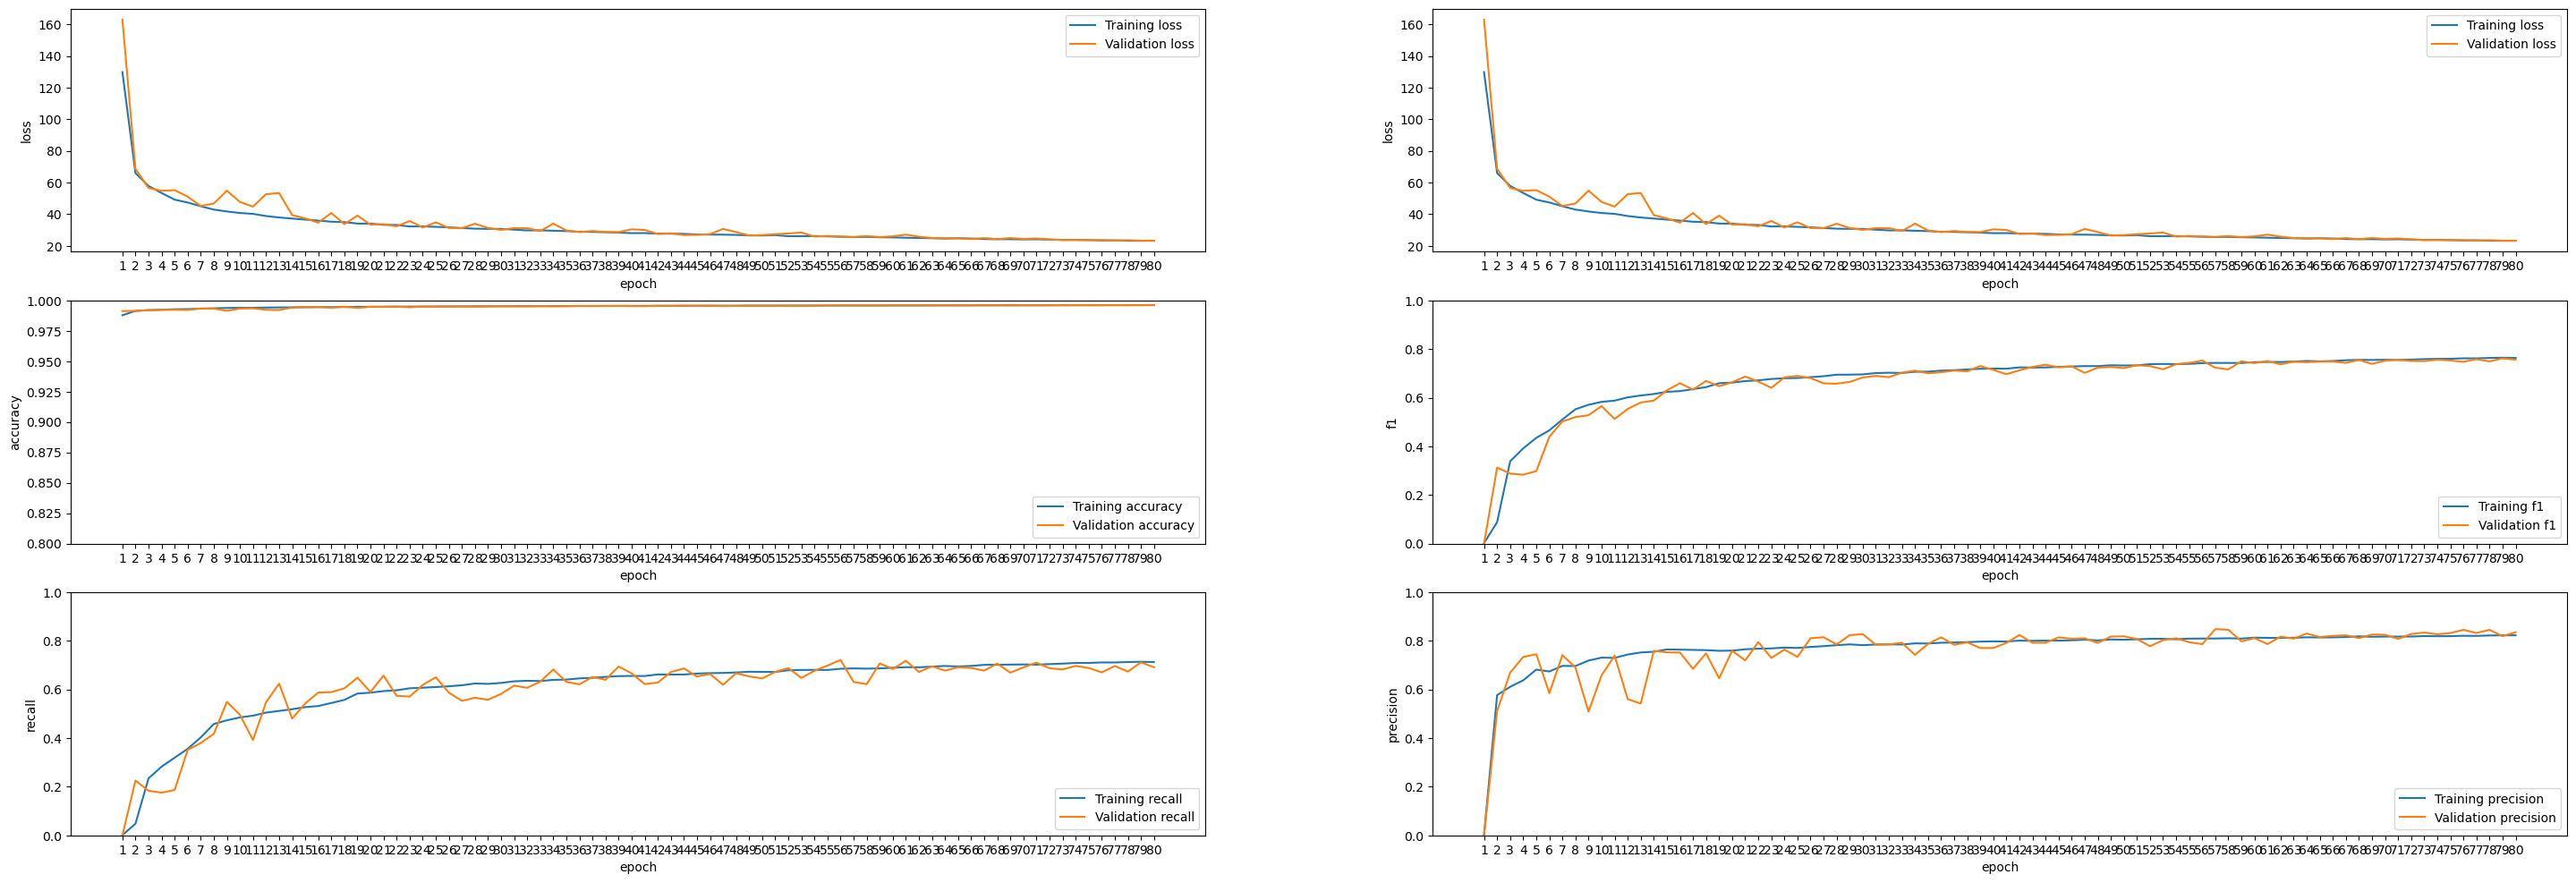

In [6]:
if Model.train_model:
    plot_losses = ["loss", "loss"]
    plot_metrics = ["accuracy", "f1", "recall", "precision"]

    path = os.path.join(Model.Data.paths["FIGURES"], "training.svg")

    plots.plot_training_history(history=history.history, list_of_loss_names=plot_losses,
                                list_of_metric_names=plot_metrics,
                                save=Model.cfg["SAVE"], path=path)

1/1 [==============================] - 0s 53ms/step


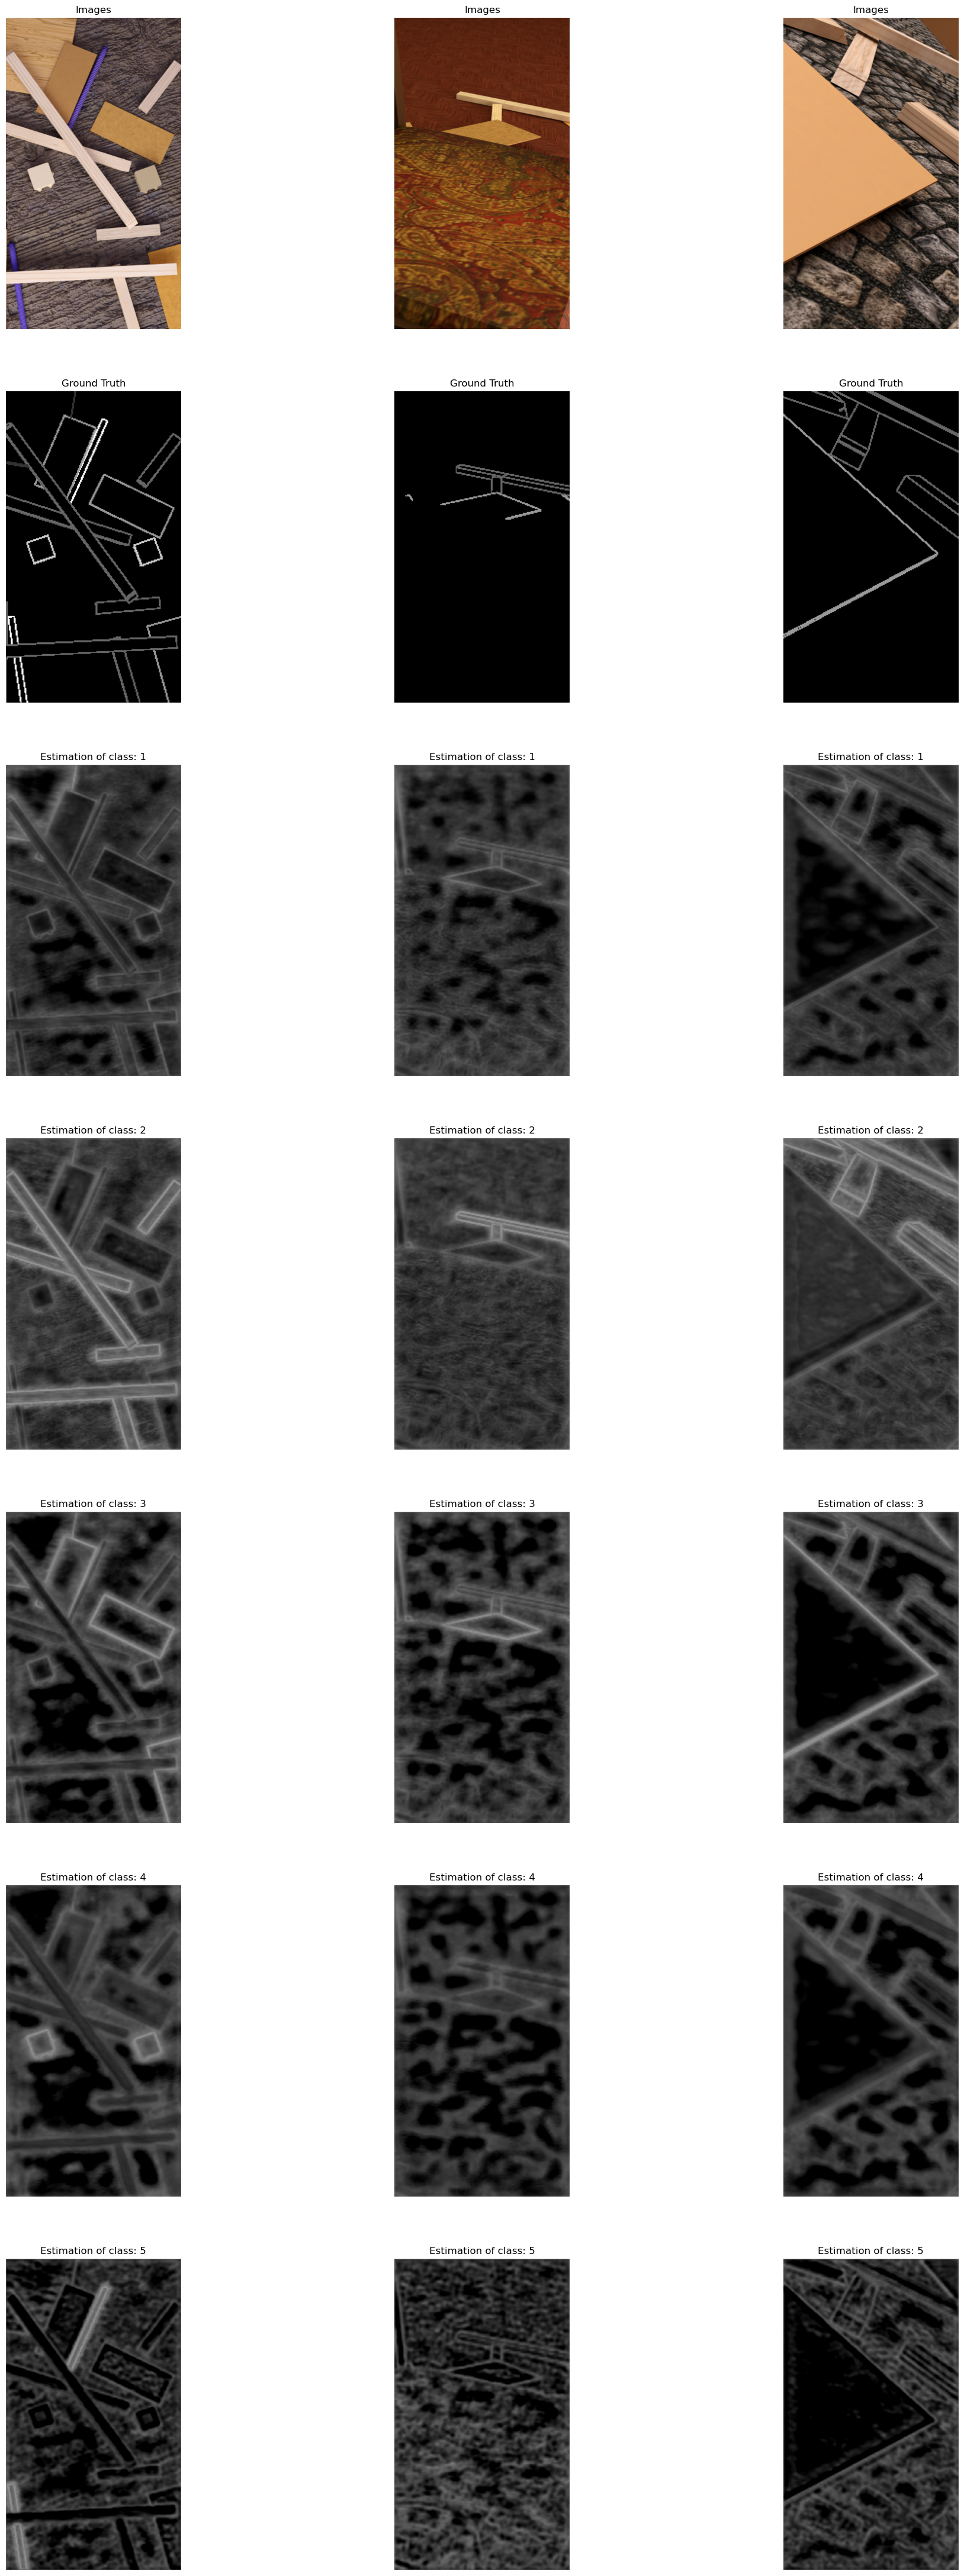

In [9]:
for inp, out in train_ds.take(1):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'], labels=out['out_edge'],
                                    predictions=pred,
                                    batch_size=DataProcessing.cfg['TEST']['BATCH_SIZE'],
                                    num_classes=DataProcessing.num_classes['edge'])

In [8]:
for inp, out in img_only_ds.take(1):
    pred = model.predict(inp)
    edge_detection_plots.plot_edges(images=inp['in_img'],
                                    predictions=pred,
                                    batch_size=DataProcessing.cfg['IMG_ONLY']['BATCH_SIZE'],
                                    num_classes=DataProcessing.num_classes['edge'])

2022-12-04 13:48:19.223475: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


ValueError: in user code:

    File "/home/david/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 2041, in predict_function  *
        return step_function(self, iterator)
    File "/home/david/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 2027, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/david/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 2015, in run_step  **
        outputs = model.predict_step(data)
    File "/home/david/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/training.py", line 1983, in predict_step
        return self(x, training=False)
    File "/home/david/miniconda3/envs/tf/lib/python3.9/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/david/miniconda3/envs/tf/lib/python3.9/site-packages/keras/engine/input_spec.py", line 197, in assert_input_compatibility
        raise ValueError(

    ValueError: Missing data for input "in_edge". You passed a data dictionary with keys ['in_img']. Expected the following keys: ['in_img', 'in_edge']


In [ ]:
### Maximum F1 Score:
path_metrics_evaluation_plot = os.path.join(Model.Data.paths["FIGURES"],
                                            "threshold_metrics_evaluation_test_ds.svg")

edge_detection_plots.plot_threshold_metrics_evaluation(model=model, ds=test_ds,
                                                       num_classes=DataProcessing.num_classes['edge'],
                                                       classes_displayed_individually=True,
                                                       save=Model.cfg["SAVE"],
                                                       path=path_metrics_evaluation_plot,
                                                       accuracy_y_lim_min=0.8)


In [ ]:
if Model.cfg["CONVERT_TO_TFLITE"]:
    Model.convert_model_to_tflite(model)